# EXPLORATORY DATA ANALYSIS

## 1. Defining the Question

### a) Specifying the Question

> The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. Our solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

### b) Defining the Question

> In order to work on the above problem, we will need to do the following .Define the question, the metric for success,
the context,
experimental design taken and the appropriateness of the available data to answer the given question Find and deal with 
outliers, anomalies, and missing data within the dataset. Perform univariate, bivariate and multivariate analysis recording 
your observations. Implement the solution by performing the respective analysis i.e. factor analysis, principal component 
analysis, and discriminant analysis. Challenge your solution by providing insights on how you can make improvements.

## 2. Reading the Data

In [1]:
#importing our modules needed for analysis.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
plt.style.use('dark_background')

In [3]:
# Loading the variables Data from the source

variable_frame  = pd.read_csv("VariableDefinitions.csv")
variable_frame

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [4]:
# Loading the Data from the source
data  = pd.read_csv("finacial_dataset.csv")
data.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

## 3. Checking the Data

In [5]:
# Determining the no. of records in our dataset
#
data.shape

(23524, 13)

In [6]:
# Previewing the top of our dataset
#
data.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [7]:
# Previewing the bottom of our dataset
# 
data.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [8]:
# Checking whether each column has an appropriate datatype
#
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.4+ MB


## 5. Tidying the Dataset

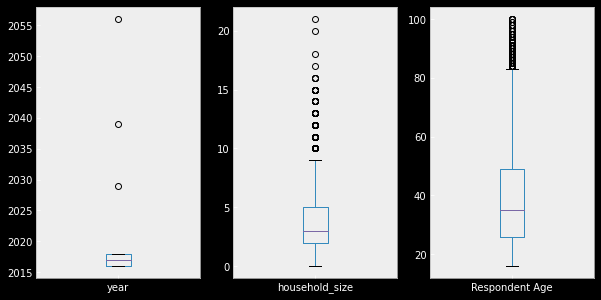

year has 3 outliers in total, which is 0.013% of data
household_size has 185 outliers in total, which is 0.79% of data
Respondent Age has 101 outliers in total, which is 0.43% of data


In [9]:
# OUTLIERS : Checking for Outliers by plotting a visual for our numeric data columns

#defining a funtion that takes the dataset name and numeric columns list as arguments 
#then returns a visual for the columns_list 
def outlier_visualiser(dataset_name, numeric_columns_list, width=10, height=5):
    
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = width
    fig_size[1] = height
    plt.rcParams["figure.figsize"] = fig_size
    plt.style.use('bmh')
    
    next_figure = 1
    for col in numeric_columns_list:
        plt.subplot(1, len(numeric_columns_list), next_figure)
        dataset_name.boxplot(col, grid=False)
        next_figure = next_figure + 1
    plt.show()
    
#we define our numeric columns list in our dataset then call the funtion for visual display
numeric_columns = ['year', 'household_size', 'Respondent Age']    
outlier_visualiser(data, numeric_columns)

#counting number of outliers in our data columns and cheking the percentage for each
def detect_outlier(data_1):
    outliers=[]
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers
#counting number of outliers in our data columns and cheking the percentage for each using z-score
for col in numeric_columns:
    rows, columns = data.shape
    percent_coefficient = float(100 / rows)
    outliers = detect_outlier(data[col])
    outliers_count = len(outliers)
    outliers_percentage = outliers_count * percent_coefficient
    print(f"{col} has {outliers_count} outliers in total, which is {outliers_percentage:.2}% of data")

>Investigating these three numeric columns we find out that outliers do exist in our targeted dataset, making us question what they may mean or possibility of cause.
* Year column has got 3 outliers. We assume error in data entry and drop these columns
* House_hold data column has got values we can't afford to lose so we use the upper most percentile to replace the outliers.
* Respondent age data column has got values we can't afford to lose so we use the upper most percentile to replace the outliers.


In [10]:
#OUTLIERS : Correcting the outliers

#droping ouliers in year
print(f"Columns before droping outliers in year column {data.shape[0]}")
year_outliers = detect_outlier(data['year'])
data = data[~data['year'].isin(year_outliers)]
print(f"Columns after droping outliers in year column {data.shape[0]} \n")

#replacing outliers in household_size with 99th percentile of the household_size data
Q99 = data['household_size'].quantile(0.99)
print(f'99th percentile of household size is {Q99} \n')

household_outliers = detect_outlier(data['household_size'])
data['household_size'].replace(household_outliers, Q99, inplace=True)

#replacing outliers in Respondent Age with 99th percentile of it's data
Q = data['Respondent Age'].quantile(0.99)
print(f'98th percentile of Respondent Age is {Q} \n')

age_outliers = detect_outlier(data['Respondent Age'])
data['Respondent Age'].replace(age_outliers, Q, inplace=True)

#review outliers using z-score
print("Reviewing Outliers Using z-score test")
for col in numeric_columns:
    rows, columns = data.shape
    percent_coefficient = float(100 / rows)
    outliers = detect_outlier(data[col])
    outliers_count = len(outliers)
    outliers_percentage = outliers_count * percent_coefficient
    print(f"{col} has {outliers_count} outliers in total, which is {outliers_percentage:.2}% of data")

Columns before droping outliers in year column 23524
Columns after droping outliers in year column 23521 

99th percentile of household size is 10.0 

98th percentile of Respondent Age is 84.0 

Reviewing Outliers Using z-score test
year has 0 outliers in total, which is 0.0% of data
household_size has 0 outliers in total, which is 0.0% of data
Respondent Age has 24 outliers in total, which is 0.1% of data


In [11]:
#OUTLIERS : update the 24 outliers still existing in our dataset on Respondent age
age_outliers = detect_outlier(data['Respondent Age'])
data['Respondent Age'].replace(age_outliers, Q, inplace=True)

#review outliers using z-score
print("Reviewing Outliers Using z-score test")
for col in numeric_columns:
    rows, columns = data.shape
    percent_coefficient = float(100 / rows)
    outliers = detect_outlier(data[col])
    outliers_count = len(outliers)
    outliers_percentage = outliers_count * percent_coefficient
    print(f"{col} has {outliers_count} outliers in total, which is {outliers_percentage:.2}% of data")

Reviewing Outliers Using z-score test
year has 0 outliers in total, which is 0.0% of data
household_size has 0 outliers in total, which is 0.0% of data
Respondent Age has 0 outliers in total, which is 0.0% of data


>ASSUMPTIONS.
* Any household_size and respondent age that exceeds the percentiles of our data defaults to upper bound percentiles listed above.
* Any household_size that exceeds 10 members will be represented by 10.
* ANy interviwee above 84 will be given the age of 84 years.

In [12]:
# VALIDITY 

#step 1 : droping columns that woun't be valid in this analysis context
data.drop(["uniqueid"], axis = 1, inplace = True)

#step 2:renaming our columns
new_naming = ['country', 'year', 'own_account', 'location_type', 'phone_access', 'household_size', 'respondent_age', 'gender', 'head_relation', 'marital_status', 'education_level', 'job_type']
data.columns = new_naming

# step 3 : dealing with any white spaces in the data
for col in data.columns:
    try:
        data.col.str.strip()
    except:
        print(f"{col} column din't have white spaces.")

#step 4 : converting countries to start with capital letters
data.country = data.country.str.capitalize()    

country column din't have white spaces.
year column din't have white spaces.
own_account column din't have white spaces.
location_type column din't have white spaces.
phone_access column din't have white spaces.
household_size column din't have white spaces.
respondent_age column din't have white spaces.
gender column din't have white spaces.
head_relation column din't have white spaces.
marital_status column din't have white spaces.
education_level column din't have white spaces.
job_type column din't have white spaces.


> ASSUMPTION
* Judging from our dataset we can conclude that it lacks accuracy computations since all the columns are independent.

In [13]:
# COMPLETENESS
# step 1 : checking  missing values
print(data.isnull().values.any())

# step 2 : Counting the missing values
print(data.isnull().sum())

#step 3 : Dropping rows with any missing value
data = data.dropna()

True
country            14
year                0
own_account        36
location_type      15
phone_access       11
household_size     28
respondent_age     34
gender             34
head_relation       4
marital_status     32
education_level    29
job_type           30
dtype: int64


In [14]:
#step 4 : verifying we don't have any missing values
data.isnull().sum()

country            0
year               0
own_account        0
location_type      0
phone_access       0
household_size     0
respondent_age     0
gender             0
head_relation      0
marital_status     0
education_level    0
job_type           0
dtype: int64

In [15]:
# CONSISTENCY 
# step 1 : dropping any duplicates in our data
print(f"Shape before droping duplicates {data.shape}")
data = data.drop_duplicates()
print(f"Shape after dropping duplicates {data.shape}")

Shape before droping duplicates (23340, 12)
Shape after dropping duplicates (18941, 12)


In [16]:
# saving our cleaned dataset
data.to_csv("./clean_data.csv")

# 6. Exploratory Analysis

## (i) Univariate Analysis

In [17]:
#reading the cleaned dataset
data = pd.read_csv("./clean_data.csv", sep=',', index_col=0)

### (a) Categorical Variables

In [18]:
# drawing frequency tables for our categorical data
categorical = ['country', 'own_account', 'location_type', 'phone_access', 'gender', 'head_relation', 'marital_status', 'education_level', 'job_type']

for col in categorical:
    print(data[col].value_counts())
    print("\n")

Rwanda      6641
Kenya       5604
Tanzania    4734
Uganda      1962
Name: country, dtype: int64


No     15810
Yes     3131
Name: own_account, dtype: int64


Rural    11650
Urban     7291
Name: location_type, dtype: int64


Yes    14009
No      4932
Name: phone_access, dtype: int64


Female    11269
Male       7672
Name: gender, dtype: int64


Head of Household      10513
Spouse                  4688
Child                   1901
Parent                  1004
Other relative           650
Other non-relatives      185
Name: head_relation, dtype: int64


Married/Living together    8635
Single/Never Married       5995
Widowed                    2372
Divorced/Seperated         1931
Dont know                     8
Name: marital_status, dtype: int64


Primary education                  9398
No formal education                3850
Secondary education                3810
Tertiary education                 1072
Vocational/Specialised training     777
6                                    26
Other/D

#### Note
> We notice anomality with our education_level data. There is an input of 6 as the education level. We hereby change the value to unkown below

In [19]:
#removing anomality in education_level column, replacing 6 with other/Dont know/RTA
anomalies = data[data['education_level'] == '6']
anomalies_list = []
for x in range(len(anomalies)):
    anomalies_list.append('6')
data.education_level = data['education_level'].replace(anomalies_list, 'Other/Dont know/RTA')


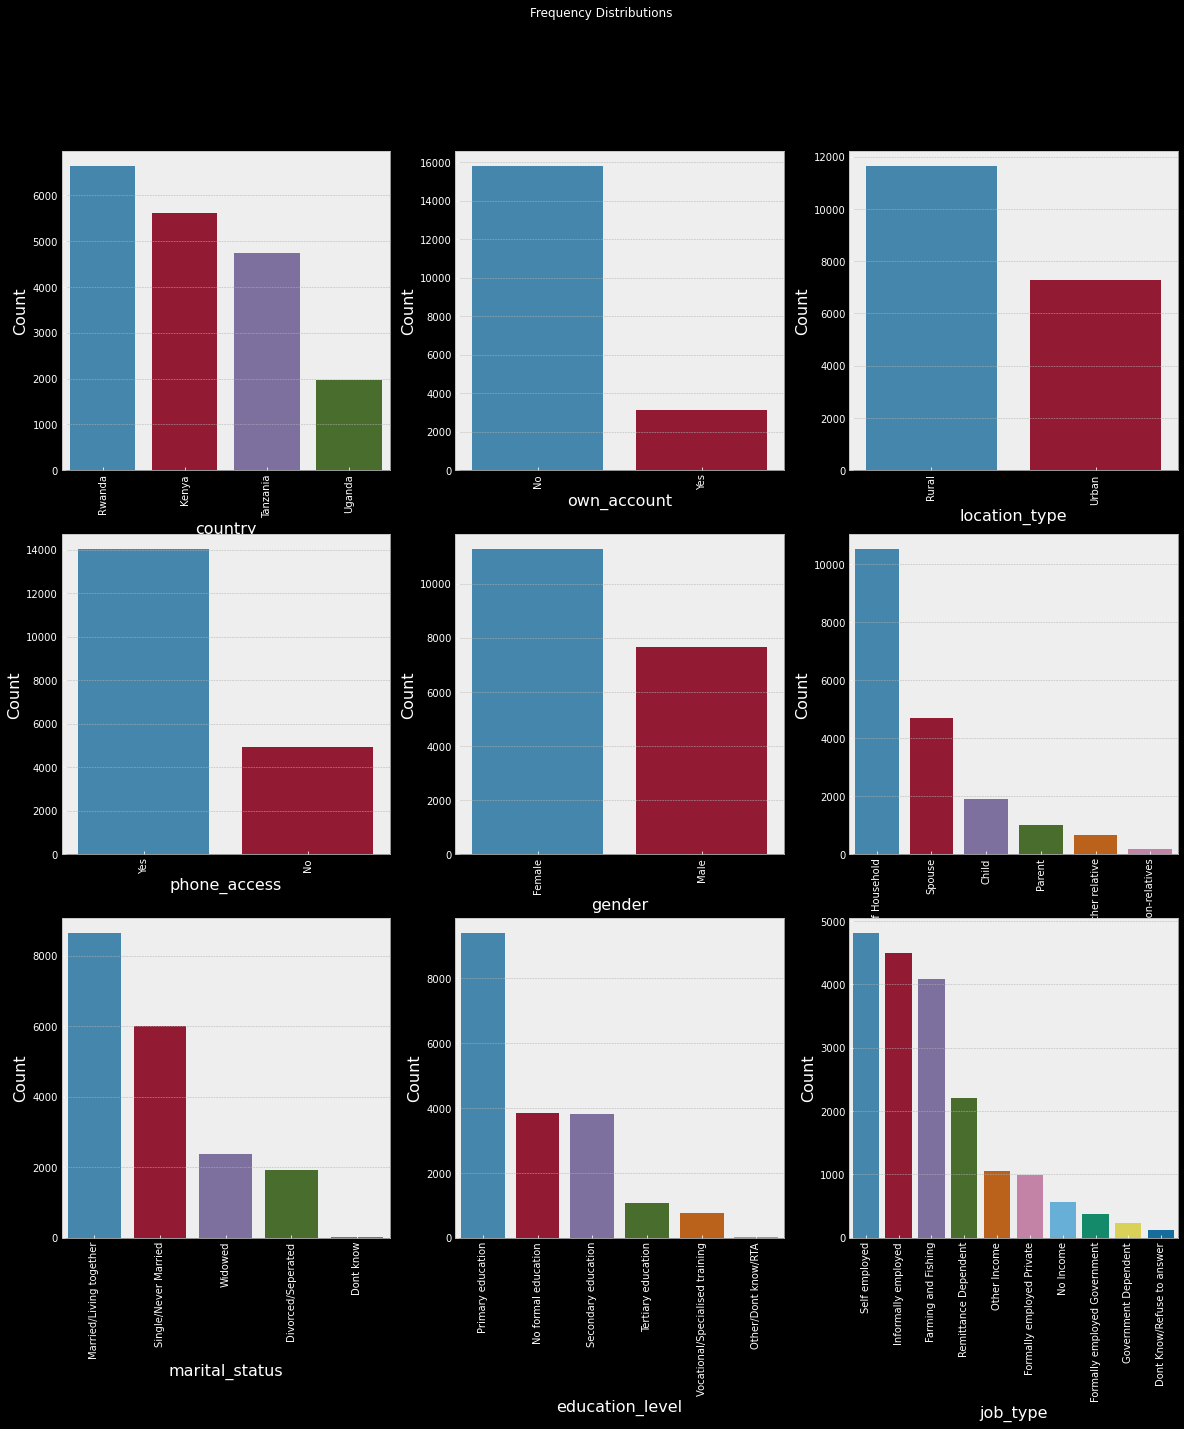

In [20]:
#plotting bar graphs for our categorical variables frequencies
'''fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 5
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size'''
    
'''for col in categorical:
    plt.bar(data[col].value_counts().keys(), data[col].value_counts())
    plt.xlabel(col)
    col_count = col_count + 1
    
    plt.xticks(rotation=90)
    plt.show()'''

fig, ((ax1, ax2, ax3,), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3,3, figsize=(20, 20))
fig.suptitle('Frequency Distributions')
axes_list = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]

#iterating our columns as we plot
for i, col in enumerate(categorical):
    sns.barplot(data[col].value_counts().keys(), data[col].value_counts(), ax=axes_list[i])
    axes_list[i].set_xlabel(col, fontsize=16)
    axes_list[i].set_ylabel('Count', fontsize=16)

#rotating our axes
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
       
plt.show()

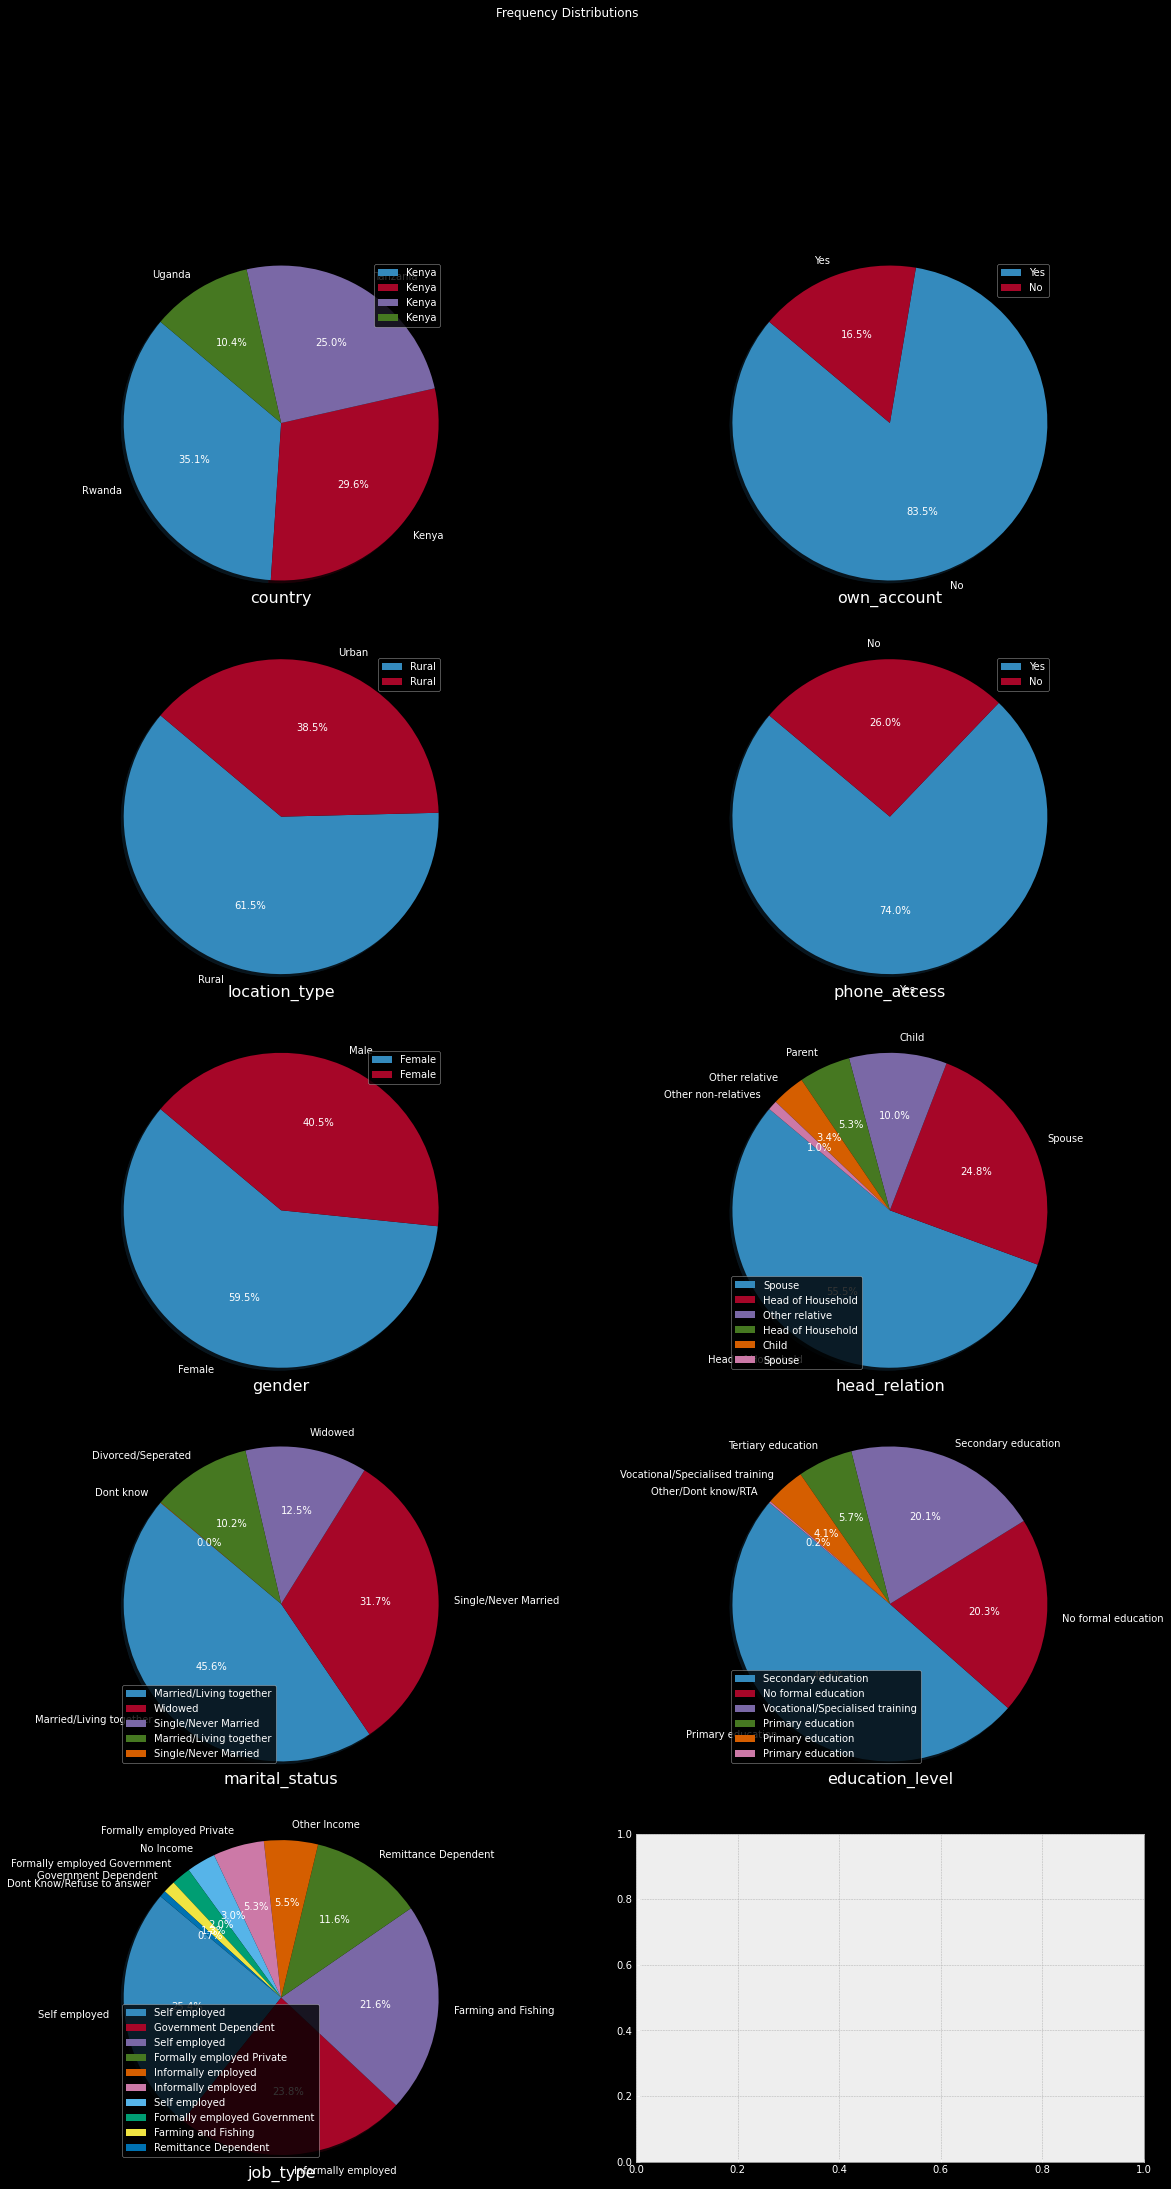

In [21]:
#plotting our frequencies on pie charts to visualise our percentage distributions
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(5,2, figsize=(20, 35))
fig.suptitle('Frequency Distributions')
axes_list = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]
plt.style.use('dark_background')

#iterating our columns as we plot
for i, col in enumerate(categorical):
    axes_list[i].pie(data[col].value_counts(), labels=data[col].value_counts().keys(), autopct='%1.1f%%',radius=1.2, shadow=True, startangle=140)
    axes_list[i].set_xlabel(col, fontsize=16)
    axes_list[i].legend(data[col], loc='best')

plt.show()

### (ii) Numeric Variables

In [22]:
# Describing our numeric variables
numeric_col = ['year', 'household_size', 'respondent_age']
data[numeric_col].describe()

,year,household_size,respondent_age
count,18941.000000,18941.000000,18941.000000
mean,2017.048836,3.727681,39.445383
std,0.864708,2.280830,16.878644
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,36.000000
75%,2018.000000,5.000000,50.000000
max,2018.000000,10.000000,87.000000


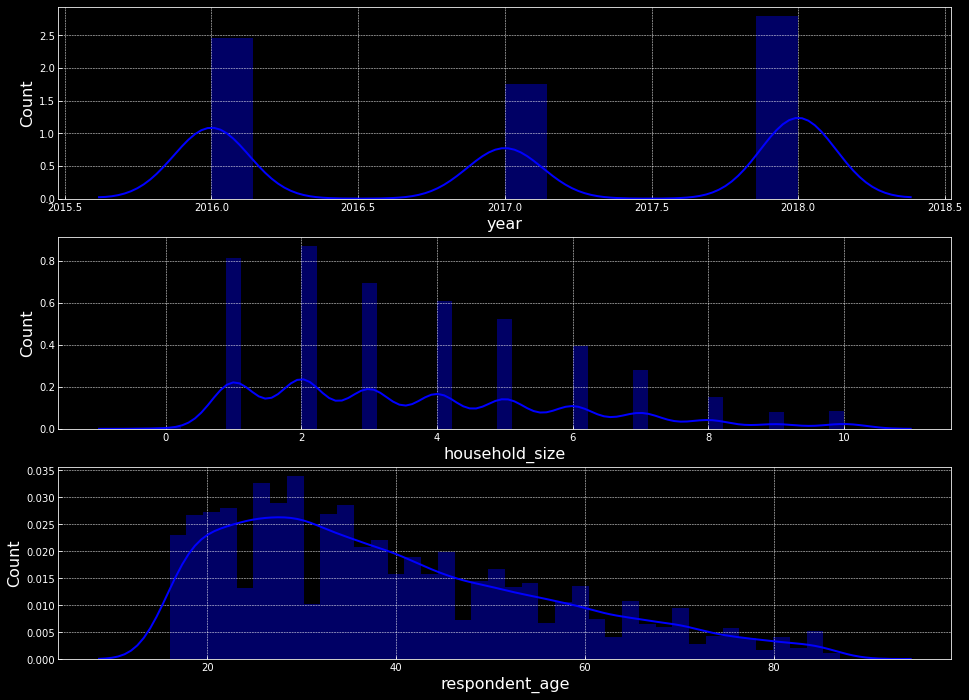

In [23]:
#frequency distributions for our numeric variables
fig, ax = plt.subplots(len(numeric_col), figsize=(16,12))

for i, col_val in enumerate(numeric_col):
    sns.distplot(data[col_val], hist=True, ax=ax[i], color='Blue')
    ax[i].set_xlabel(col_val, fontsize=16)
    ax[i].set_ylabel('Count', fontsize=16)

plt.show()

### (iii) Univariate Conclusion

> Our numeric variable seem to concentrate to the left (negatively skewed) meaning our respondent and household size tend to concentrate on around the 30th percentile. We have less male, people with phones and more respondats come from Rwanda.

## (b) Bivariate Analysis

### (i) Numeric and Numeric Variables

In [24]:
#just a confirmation that our interested columns for this analysis are in float data types
data['respondent_age'] = pd.to_numeric(data['respondent_age'])
data['household_size'] = pd.to_numeric(data['household_size'])

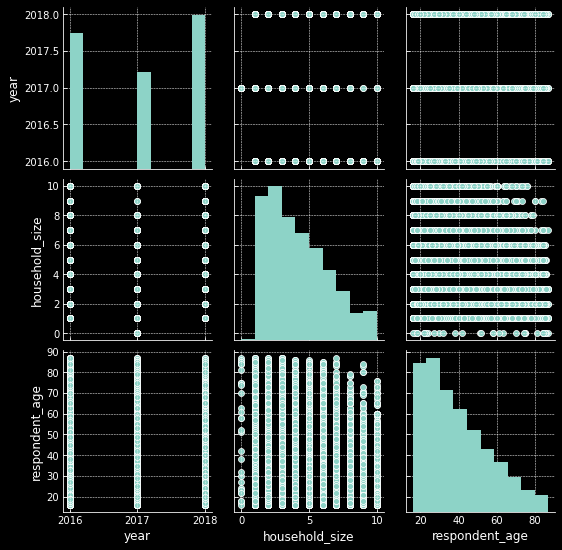

In [25]:
# drawing scatter plots on numeric variables to visualize any correlation
sns.pairplot(data[numeric_col])

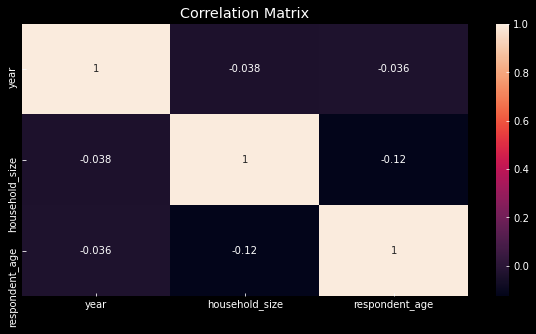

In [26]:
# plotting heatmap to show how our numeric variables correlate
sns.heatmap(data[numeric_col].corr(),annot=True)
plt.title('Correlation Matrix')
plt.show()

In [27]:
#calculating the correlations of the numeric variables between household_size and respondent_age
pearson_coeff = data["household_size"].corr(data["respondent_age"], method="pearson")
print(f"Correlation between household_size and respondent_age is {pearson_coeff}")

Correlation between household_size and respondent_age is -0.12410760586177526


### (ii) Numeric and Categorical Variables

In [28]:
#defining our functions for this exercise
#defining a function that retuns a list for specific filter conditions
def list_maker(frame, query, x_axis_list): #frame with data, what we are chasing, list to use in x_axis
    alist = []
    scale = x_axis_list
    for x in scale:
        x = float(x)
        try:
            alist.append(frame[(x, query)])
        except:
            alist.append(0)
    return alist

#a function that takes a dataframe, numeric column and categorical column and returns
#a frequency table and it's visual, dependent on function list_maker
def numeric_vs_categorical_visualizer(dataframe, numeric_col_name = None, categorical_col_name = None):
    result = dataframe.groupby([numeric_col_name, categorical_col_name])[numeric_col_name].count()

    #our values lists and plot
    ages = [x for x in range(int(max(dataframe[numeric_col_name])) + 1)]
    plt.style.use('dark_background')
    for x in dataframe[categorical_col_name].unique():
        w = x
        x = list_maker(result, x, ages)
        plt.plot(ages, x, label=w)
        plt.xlabel(numeric_col_name)
        plt.ylabel('Count')
        plt.title(f'{categorical_col_name} Count vs {numeric_col_name}')
    plt.legend()
    plt.show()

#### 0.1 -  Age Analysis vs categorical columns

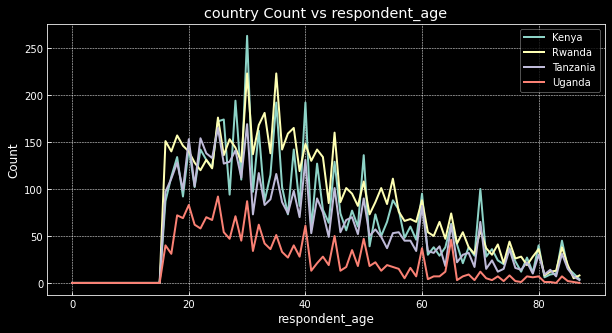

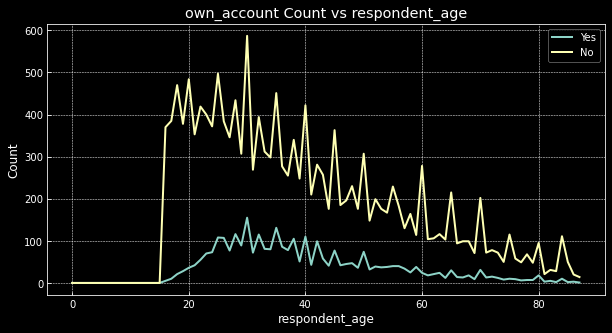

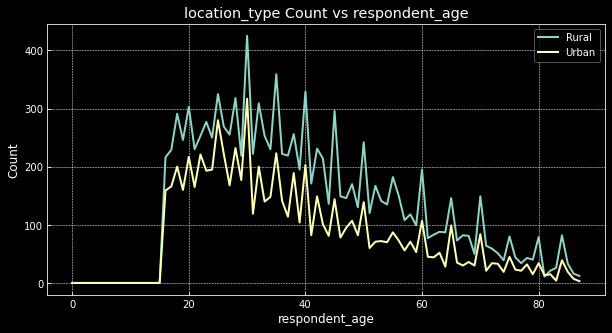

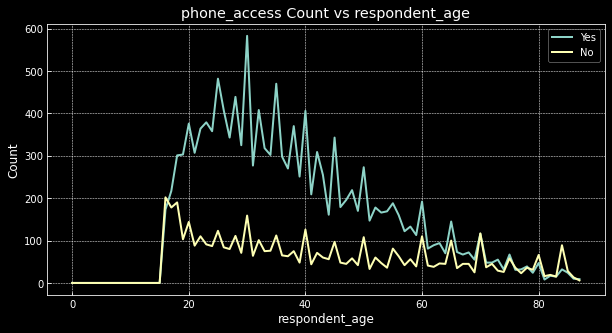

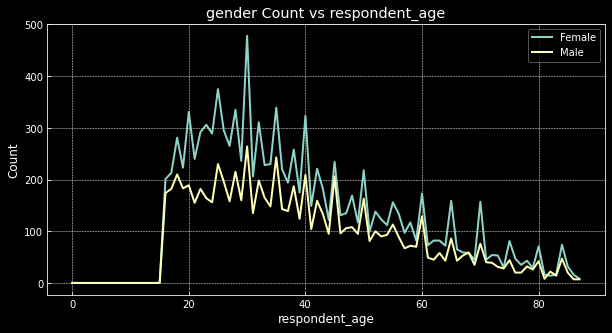

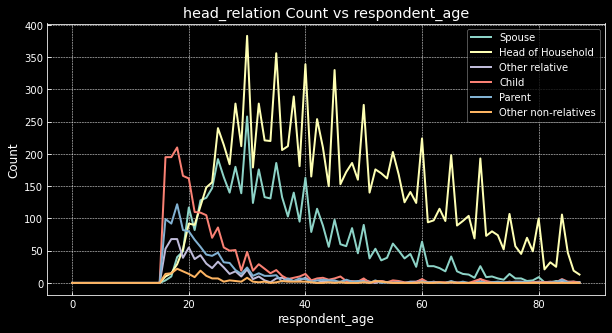

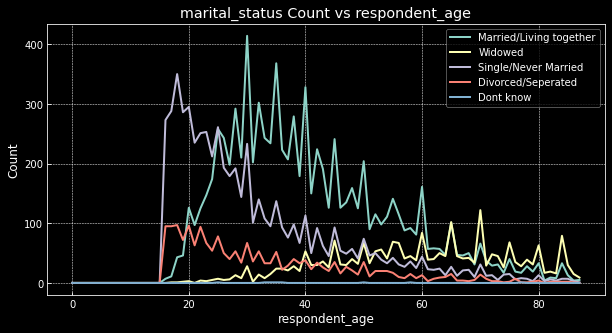

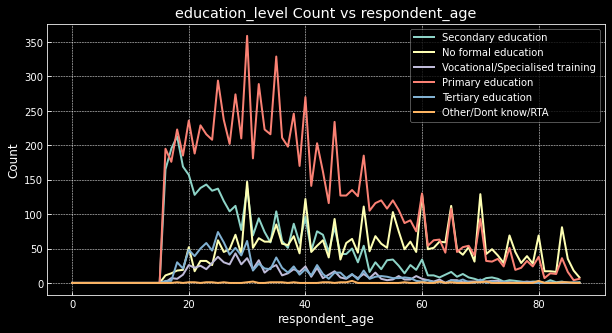

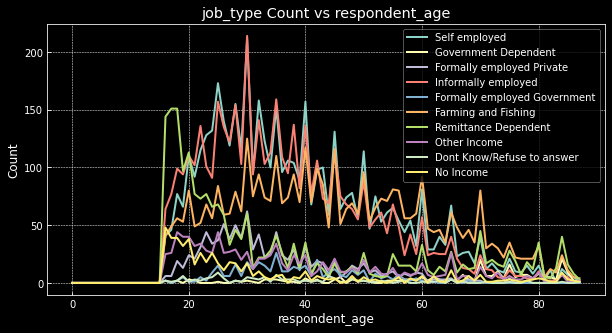

In [29]:
# Analysis of categorical columns vs respondent_age
numeric_column = 'respondent_age'
for category in categorical:
    numeric_vs_categorical_visualizer(data, numeric_col_name=numeric_column, categorical_col_name=category)

#### 0.2 - Household Size Analysis vs categorical variables

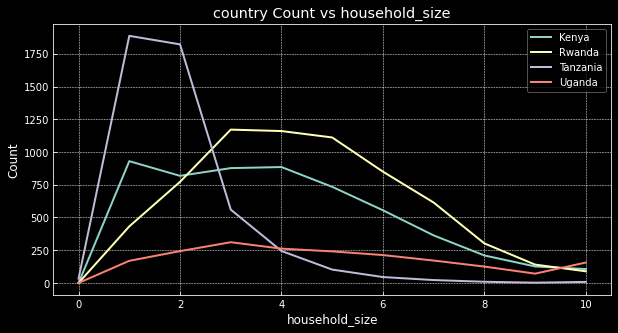

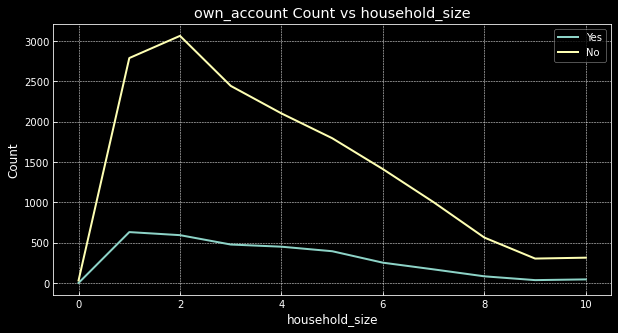

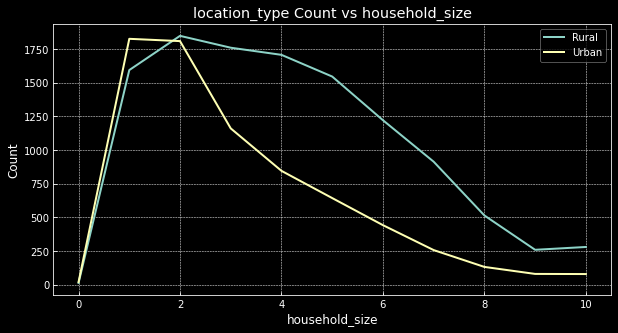

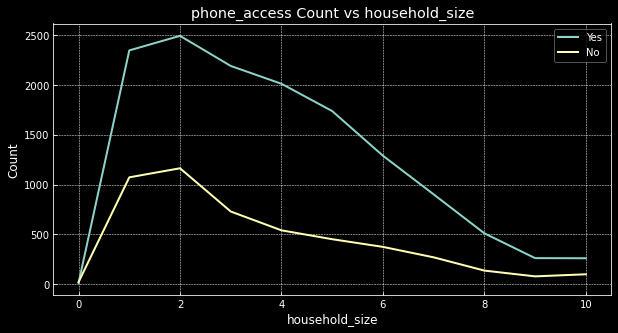

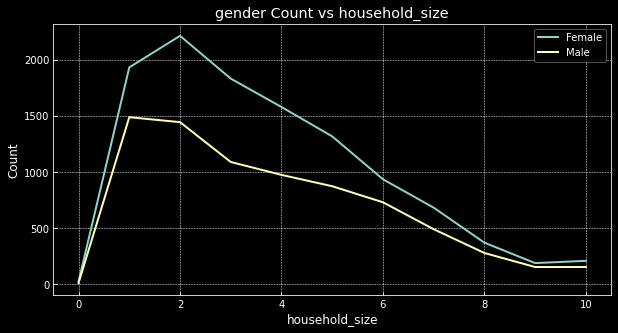

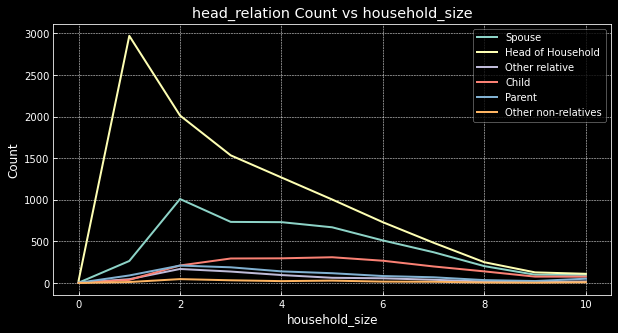

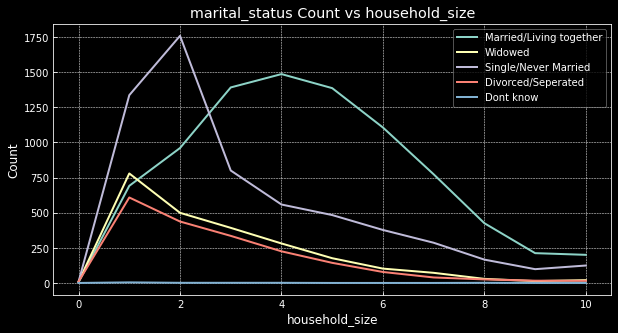

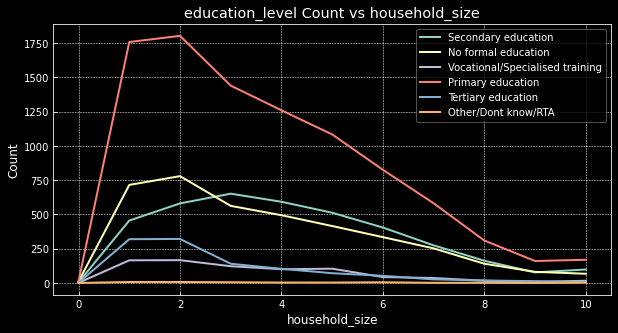

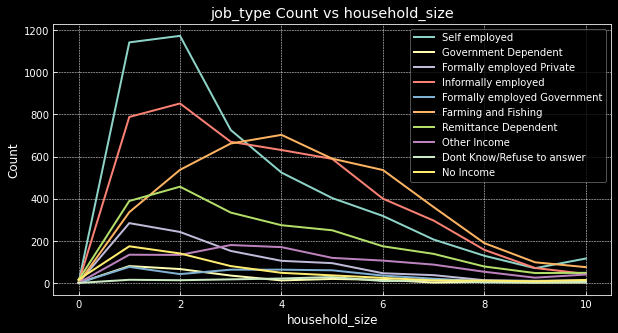

In [30]:
# Analysis of categorical columns vs household_size
numeric_column = 'household_size'
for category in categorical:
    numeric_vs_categorical_visualizer(data, numeric_col_name=numeric_column, categorical_col_name=category)

### (iii) Categorical and Categorical Variables

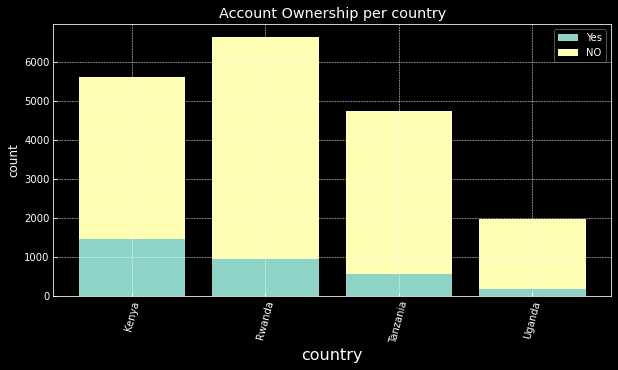

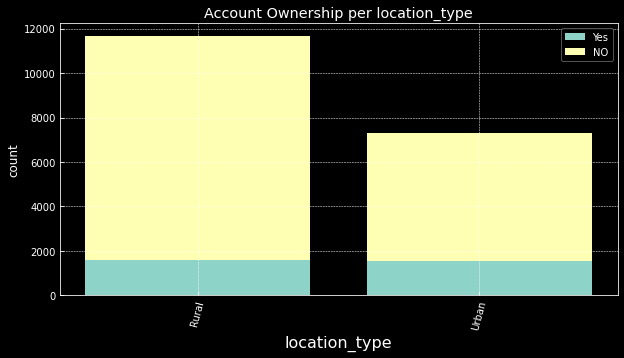

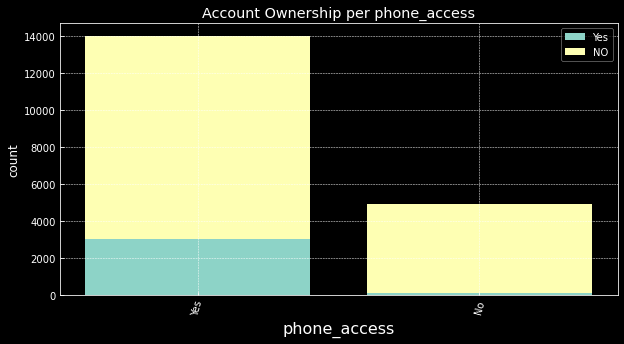

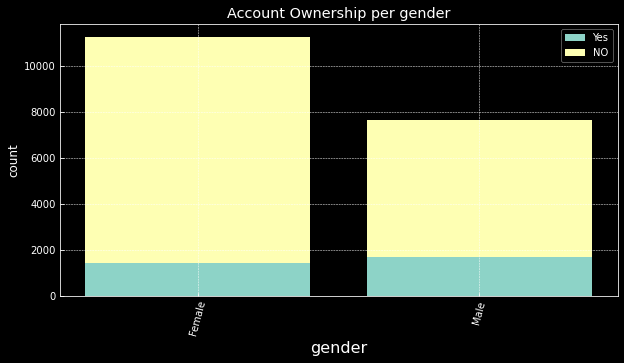

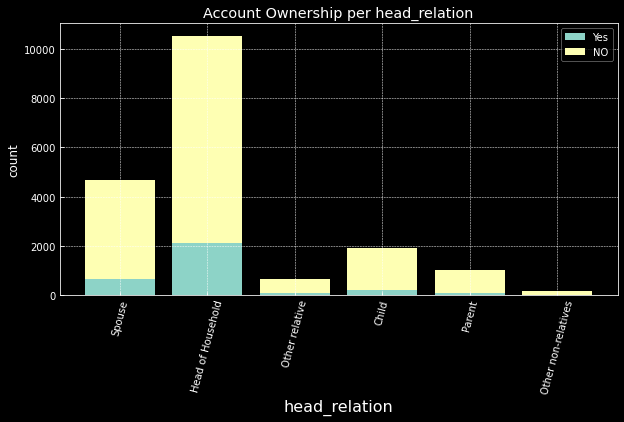

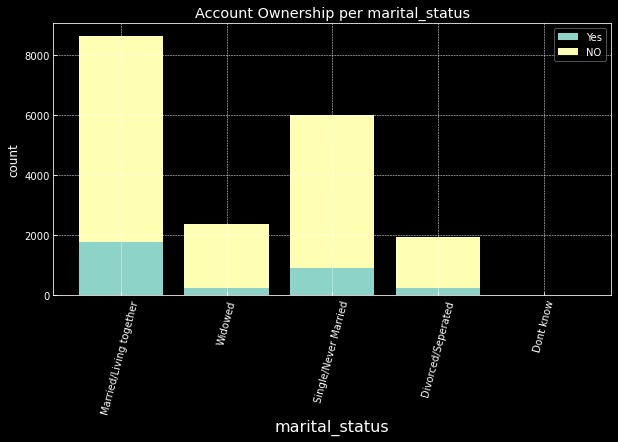

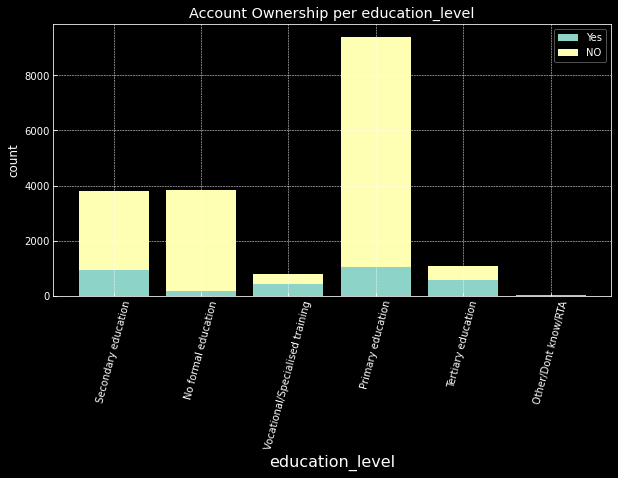

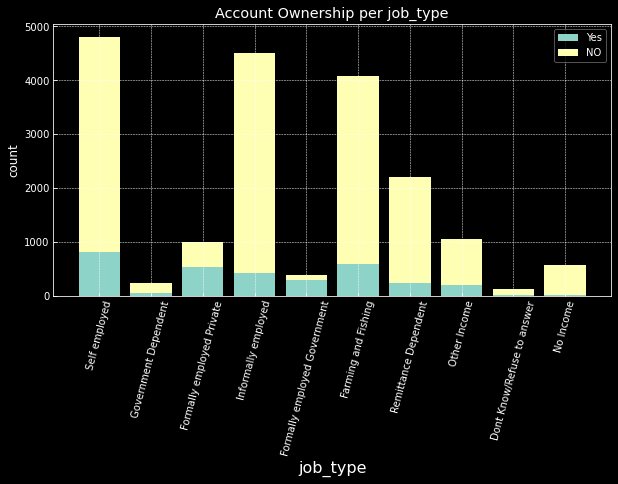

In [31]:
# what are the statistics in relation to bank account ownership
def category_vs_category_visualizer(data, other):
    result = data.groupby(['own_account'])[other].value_counts()
    countries = data[other].unique()
    no = []
    yes = []
    for country in countries:
        try:
            no.append(result[('No', country)])
        except:
            alist.append(0)
    for country in countries:
        try:
            yes.append(result[('Yes', country)])
        except:
            alist.append(0)
    return countries, no, yes

for category in categorical:
    if category != 'own_account':
        cat, no, yes = category_vs_category_visualizer(data, category)
        plt.bar(cat, yes, label="Yes")
        plt.bar(cat, no,bottom=yes, label="NO")
        plt.legend()
        plt.xlabel(category, fontsize=16)
        plt.ylabel("count")
        plt.title(f"Account Ownership per {category}")
        plt.xticks(rotation=75)
        plt.show()

## (C) Multivariate Analysis

### (i) PCA

In [32]:
# Step 1: Preprocessing
# divide the dataset into a feature set and corresponding labels.

#first encoding our data
country = {'Kenya':1, "Tanzania":2, "Rwanda":3, "Uganda":4}
location_type = {"Urban":1, "Rural":0}
phone_access = {"Yes":1, "No":0}
gender = {"Male":1, "Female":0}


data['country'].replace(country, inplace=True)
data['location_type'].replace(location_type, inplace=True)
data['phone_access'].replace(phone_access, inplace=True)
data['gender'].replace(gender, inplace=True)

X = data.iloc[:, [0, 3, 4, 5, 6, 7]]
y = data.iloc[:, 2]

In [33]:
# Step 2: Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [34]:
# Step 3: Normalization
# perform standard scalar normalization to normalize our feature set. 
 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
from sklearn.decomposition import PCA

pca = PCA()
X_train0 = pca.fit_transform(X_train)
X_test0 = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.2370227 , 0.19352032, 0.17075696, 0.1459262 , 0.1337893 ,
       0.11898451])

#### Using 1 Principal Component

In [36]:
#Using 1 Principal Component
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train1 = pca.fit_transform(X_train)
X_test1 = pca.transform(X_test)

# Training and Making Predictions using randomforestclassifier
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train1, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test1)

#  Performance Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[3163    0]
 [ 626    0]]
Accuracy 0.8347849036685141


#### Using 2 Principal Component

In [37]:
#Using 2 Principal Component
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train2 = pca.fit_transform(X_train)
X_test2 = pca.transform(X_test)

# Training and Making Predictions using randomforestclassifier
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train2, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test2)

#  Performance Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[3163    0]
 [ 626    0]]
Accuracy 0.8347849036685141


#### PCA CONCLUSION
From the above experimentation we achieved optimal level of accuracy while significantly reducing the number of features in the dataset. We saw that accuracy achieved with only 1 principal component is equal to the second one and there are both above 80% right. This is good since we don't understand the data colletion methods used.



### (ii) Factor Analysis

In [38]:
# loading our cleaned dataset
data = pd.read_csv('clean_data.csv', sep=',', index_col=0)
fdata = data.iloc[:, [0, 3, 4, 5, 6, 7]].copy()

In [39]:
country = {'Kenya':1, "Tanzania":2, "Rwanda":3, "Uganda":4}
location_type = {"Urban":1, "Rural":0}
phone_access = {"Yes":1, "No":0}
gender = {"Male":1, "Female":0}

fdata['country'].replace(country, inplace=True)
fdata['location_type'].replace(location_type, inplace=True)
fdata['phone_access'].replace(phone_access, inplace=True)
fdata['gender'].replace(gender, inplace=True)

In [40]:
#pip install factor_analyzer==0.2.3

In [41]:
# Bartlett’s test of sphericity check

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(fdata)
chi_square_value, p_value

(3204.638264884917, 0.0)

In [42]:

# Kaiser-Meyer-Olkin (KMO) Test
#
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(fdata)
kmo_model

0.5498890787099644

### Factor Analysis Conclusion

> We may conclude that factor analysis is not the best solution to this problem since our Kmo is inadequate by being less than 0.6.

### (iii) Discriminant Analysis

In [43]:
#we will use our previous features and labels from principle component analysis
feature = X
label = y

#we now split our dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.2, random_state=0)

In [44]:
# We now need to perform feature scaling. We execute the following code to do so:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [45]:
# Performing Linear Discriminant Analysis

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [46]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [47]:
# Evaluating the Performance

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[3163    0]
 [ 626    0]]
Accuracy0.8347849036685141


### Discriminant analysis Conclusion
> Discriminant analysis tends to learn the data better with an efficiency of roughly 83% which is good learning.